Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

### Problem Statement
Task: Build a classifier which can identify 'fraud' orders.
Each row represents an 'order', it's corresponding details and some aggregated features.

### Clarifying questions
What is termed as fraudulent order? -> Reseller fraud;
Seller tries to buy in bulk and then sells on a margin

In [2]:
# Importing data
df = pd.read_csv('fraud_order_classifier.csv')
df.head()

,order_id,product_id,quantity,selling_price,order_date,shipping_type,user_id,user_account_created_date,address_id,city,pincode,phone,vertical,discount,count_14_days,count_28_days,count_56_days,category_purchase_count_bks,category_purchase_count_X4kt,category_purchase_count_X4rr,category_purchase_count_dep,category_purchase_count_kyh,category_purchase_count_mgl,category_purchase_count_dgv,category_purchase_count_ixq,category_purchase_count_X26x,category_purchase_count_t06,category_purchase_count_amz,category_purchase_count_reh,category_purchase_count_ckf,category_purchase_count_j9e,category_purchase_count_jek,category_purchase_count_tyy,category_purchase_count_vdm,category_purchase_count_X6bo,category_purchase_count_X2oq,category_purchase_count_mcr,category_purchase_count_osp,category_purchase_count_r18,label
0,a2183866942a8ecd252727d95130ff29,e7b06ca068c7f50b06ecb5758b51258d,1,5507,2014-05-24,non-ndd,00305fba264d3fd74b9da8cb8c6ab654,2012-08-13 06:04:03,9701f7016eff920d184e4764aac211e2,9f6774de2352cf01e1be77f8aa4cf604,0072c03dc788f3914635ccc956b6fe4b,00001a7f0efb99508907be3eba5cc8ab,Handset,18.942,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
1,61c2c93a011a78c76d2e720120bbfd4c,7fec8d8425a12add61c7a83d8270a0cb,1,6999,2014-05-23,ndd,f1f9a2662d06cfd0abc8d2b7147ade37,2012-04-25 09:08:45,a3c2e034510ab9f992bf86ad6327fc6b,89e5701b3aee3a4011e76c441044028b,b4ec1f705e664ba907ce1ce14125cc2f,000027799e494160ebada3a8887dd37a,Handset,1.946,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
2,4049bffb21037c1ba41064802baa86f6,59f6d6f76798b14e053f136a5c726d65,1,5589,2014-05-28,non-ndd,a3e8c45cd263e72f7001303a8b22649c,2012-08-10 18:44:49,8fc0ad66f61f9612d9aec2e0ddeebc10,64f692fc1ed662e37a49acaf1c0d0b4a,64aab4822a93ee289b127feffe5ec856,000046d64a9eaaf8832f717e3cfa5c72,MobileTabletWithCallFacility,28.819,1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
3,51317d4d2583de8a4813972c94637449,a57566363f05f7bba50c1f7d3d6a93f8,1,79,2014-05-27,non-ndd,beda308ae5e3bfcefd1d9394c6532bce,2012-10-19 00:56:02,ee8df0f2fb20e881eb503748fa653d29,90a60ca1704e4b34248b98bc417c4f58,4affb666770e43a21a8c3f3b9e1cf5dc,00005ebc921ffb6b3f0f3ba772feb585,Book,25.760,2,2,2,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,26.0,0.0,2.0,1.0,0.0,1.0,16.0,0.0,3.0,7.0,0.0,1.0,2.0,normal
4,25bc2ec67785edcfa5f93ee14023bf8b,3a54c84b0446bf27d46df55edb48c2e1,1,147,2014-05-27,non-ndd,beda308ae5e3bfcefd1d9394c6532bce,2012-10-19 00:56:02,ee8df0f2fb20e881eb503748fa653d29,90a60ca1704e4b34248b98bc417c4f58,4affb666770e43a21a8c3f3b9e1cf5dc,00005ebc921ffb6b3f0f3ba772feb585,Book,35.119,1,1,1,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,26.0,0.0,2.0,1.0,0.0,1.0,16.0,0.0,3.0,7.0,0.0,1.0,2.0,normal


### Exploratory Data Analysis

In [3]:
# Data shape
df.shape

(481107, 40)

Approximately 4.8 lac data points with 40 columns

In [4]:
# De duplication
print("Data size before : ", df.shape)
df = df.drop_duplicates()
print("Data size after : ", df.shape)

Data size before :  (481107, 40)
Data size after :  (481107, 40)


#### Analyze account age vs fraud

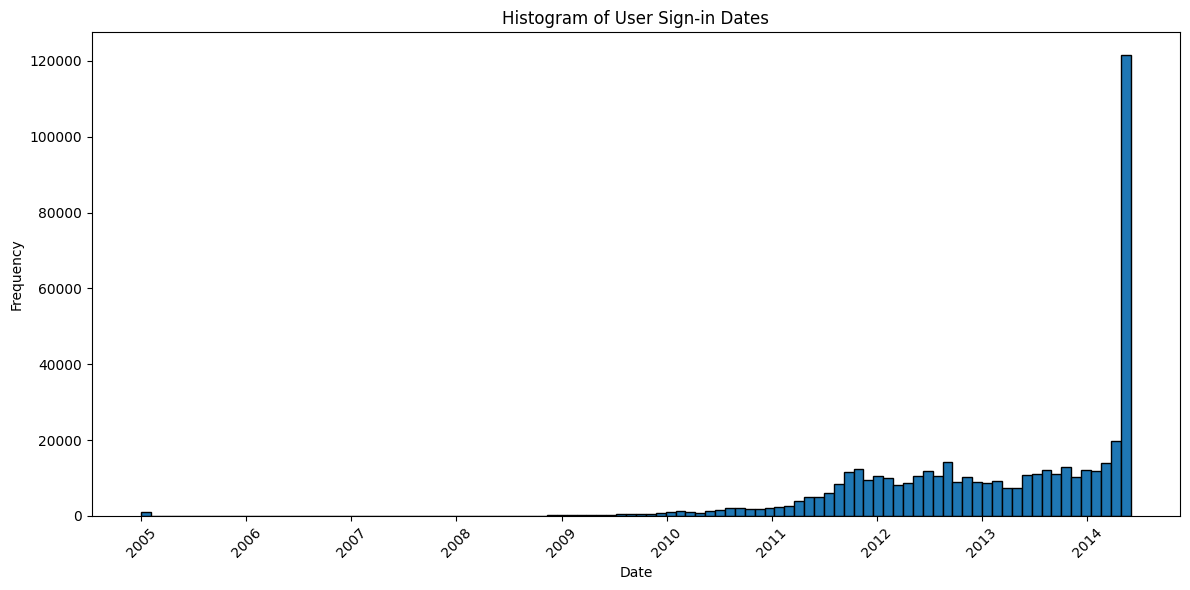

In [5]:
df['user_account_created_date'] = pd.to_datetime(df['user_account_created_date'])
plt.figure(figsize=(12, 6))
plt.hist(df['user_account_created_date'], bins=100, edgecolor='black')
plt.title('Histogram of User Sign-in Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

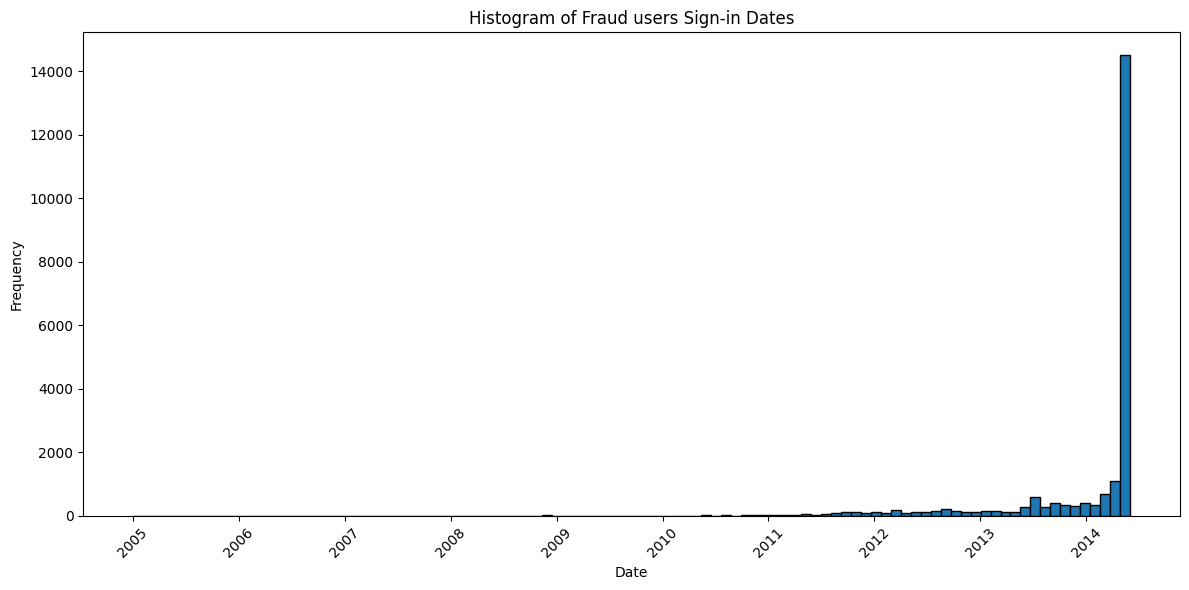

In [6]:
plt.figure(figsize=(12, 6))
plt.hist(df[df['label']=='fraud']['user_account_created_date'], bins=100, edgecolor='black')
plt.title('Histogram of Fraud users Sign-in Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Fraud users are relatively recent

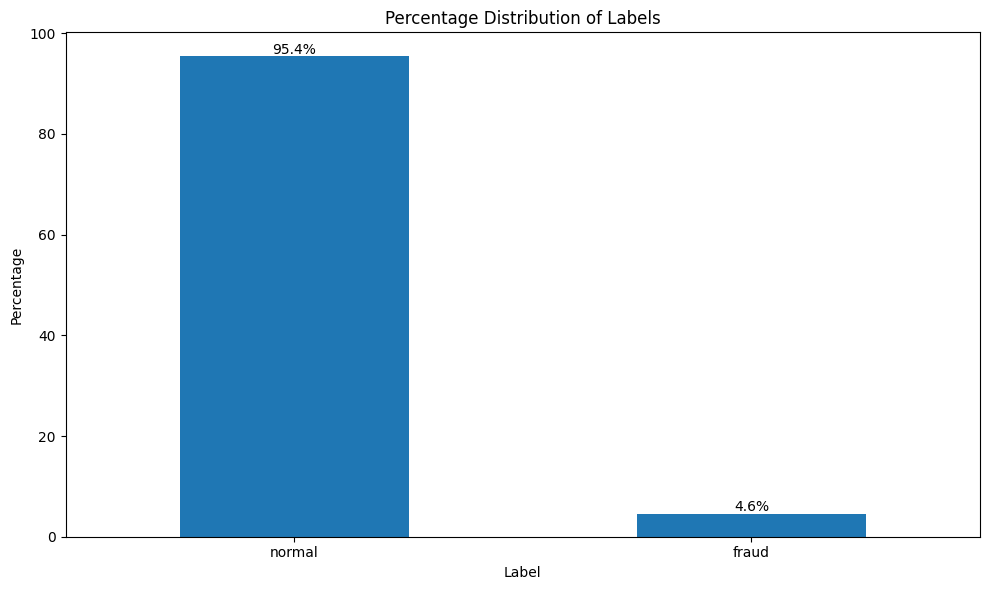

In [7]:
# Analyzing target label split
label_percentages = 100* (df['label'].value_counts() / df['label'].shape[0])
plt.figure(figsize=(10, 6))
label_percentages.plot(kind='bar')

plt.title('Percentage Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

for i, v in enumerate(label_percentages):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

Imabalanced dataset with Fraud class samples of 4.6%

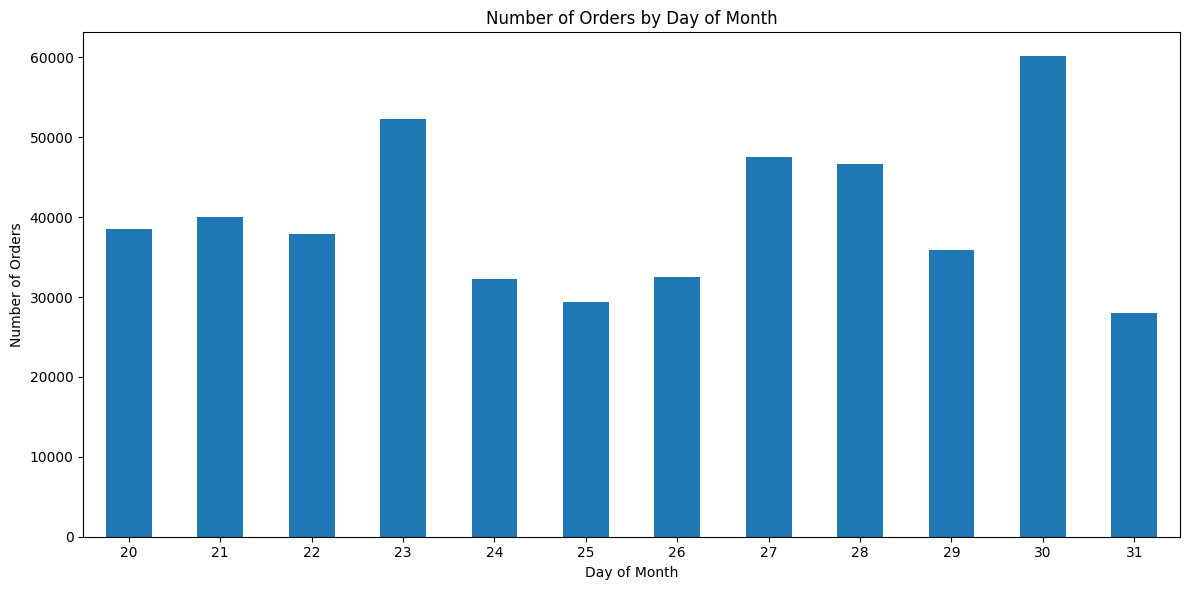

In [8]:
# Data span across years
pd.to_datetime(df['order_date']).dt.year.value_counts() # Year: 2014 
pd.to_datetime(df['order_date']).dt.month.value_counts() # Month: May
pd.to_datetime(df['order_date']).dt.day.value_counts() # Days: 20 to 31 ; 12 days 

orders_per_day = pd.to_datetime(df['order_date']).dt.day.value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
orders_per_day.plot(kind='bar')

plt.title('Number of Orders by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [9]:
# Fraud spread across days
df['day'] = pd.to_datetime(df['order_date']).dt.day
df['day of week'] = pd.to_datetime(df['order_date']).dt.dayofweek

pivot_result = round(df.pivot_table(values='order_id', 
                              index=['day', 'day of week'], 
                              columns='label', 
                              aggfunc='count'), 2).reset_index(drop=False)
pivot_result['total'] = pivot_result['fraud'] + pivot_result['normal']
pivot_result['fraud %'] = 100 * pivot_result['fraud'] / pivot_result['total']
pivot_result['normal %'] = 100 * pivot_result['normal'] / pivot_result['total']
pivot_result

label,day,day of week,fraud,normal,total,fraud %,normal %
0,20,1,1407,37160,38567,3.648197,96.351803
1,21,2,1620,38343,39963,4.053750,95.946250
2,22,3,1710,36137,37847,4.518192,95.481808
3,23,4,2155,50128,52283,4.121799,95.878201
4,24,5,1520,30778,32298,4.706174,95.293826
5,25,6,841,28544,29385,2.862004,97.137996
6,26,0,1113,31337,32450,3.429892,96.570108
7,27,1,3032,44541,47573,6.373363,93.626637
8,28,2,3673,43016,46689,7.866949,92.133051
9,29,3,1970,33888,35858,5.493893,94.506107


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481107 entries, 0 to 481106
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   order_id                      481107 non-null  object        
 1   product_id                    481107 non-null  object        
 2   quantity                      481107 non-null  int64         
 3   selling_price                 481107 non-null  int64         
 4   order_date                    481107 non-null  object        
 5   shipping_type                 481107 non-null  object        
 6   user_id                       481107 non-null  object        
 7   user_account_created_date     481107 non-null  datetime64[ns]
 8   address_id                    481107 non-null  object        
 9   city                          481107 non-null  object        
 10  pincode                       481107 non-null  object        
 11  phone        

40 columns:
- 23 columns with data type float
- 5 columns with data type int
- 12 columns with data type object

In [11]:
## Null value Analysis
100 * df.isna().sum()/len(df)

order_id                        0.000000
product_id                      0.000000
quantity                        0.000000
selling_price                   0.000000
order_date                      0.000000
shipping_type                   0.000000
user_id                         0.000000
user_account_created_date       0.000000
address_id                      0.000000
city                            0.000000
pincode                         0.000000
phone                           0.000000
vertical                        0.000000
discount                        0.000000
count_14_days                   0.000000
count_28_days                   0.000000
count_56_days                   0.000000
category_purchase_count_bks     3.991628
category_purchase_count_X4kt    3.991628
category_purchase_count_X4rr    3.991628
category_purchase_count_dep     3.991628
category_purchase_count_kyh     3.991628
category_purchase_count_mgl     3.991628
category_purchase_count_dgv     3.991628
category_purchas

- Columns of format 'category_purchase_count_{}' contain null values : ~4%
- Other columns don't have null values

In [12]:
df.describe()

,quantity,selling_price,user_account_created_date,discount,count_14_days,count_28_days,count_56_days,category_purchase_count_bks,category_purchase_count_X4kt,category_purchase_count_X4rr,category_purchase_count_dep,category_purchase_count_kyh,category_purchase_count_mgl,category_purchase_count_dgv,category_purchase_count_ixq,category_purchase_count_X26x,category_purchase_count_t06,category_purchase_count_amz,category_purchase_count_reh,category_purchase_count_ckf,category_purchase_count_j9e,category_purchase_count_jek,category_purchase_count_tyy,category_purchase_count_vdm,category_purchase_count_X6bo,category_purchase_count_X2oq,category_purchase_count_mcr,category_purchase_count_osp,category_purchase_count_r18,day,day of week
count,481107.000000,481107.000000,481107,481107.00000,481107.000000,481107.000000,481107.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.00000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,481107.000000,481107.000000
mean,1.077401,4327.573053,2013-02-24 00:31:49.893073664,15.41395,24.710054,24.710054,24.710054,606.148780,0.968502,0.629665,0.171824,0.192038,0.331234,0.420937,0.182006,0.022542,0.871930,0.004601,0.22753,0.163095,0.227987,0.107352,2.256130,0.068688,1.514656,0.826381,0.019405,0.365901,0.134769,25.575834,2.927274
min,1.000000,1.000000,2005-01-01 00:00:00,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,1.000000,214.000000,2012-04-12 14:21:51,1.94600,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,2.000000
50%,1.000000,559.000000,2013-06-08 19:02:55,14.00000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,3.000000
75%,1.000000,6999.000000,2014-04-29 09:39:34,24.73800,3.000000,3.000000,3.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,4.000000
max,10.000000,152955.000000,2014-05-31 23:57:16,69.94400,3072.000000,3072.000000,3072.000000,227262.000000,1195.000000,1554.000000,191.000000,206.000000,299.000000,520.000000,422.000000,23.000000,591.000000,18.000000,576.00000,265.000000,296.000000,127.000000,762.000000,195.000000,1737.000000,1039.000000,55.000000,446.000000,99.000000,31.000000,6.000000
std,0.367006,7047.851746,NaN,13.37637,162.501839,162.501839,162.501839,4535.245052,10.952076,21.589054,1.391025,2.159471,3.293350,4.030846,3.314784,0.255153,5.523463,0.123939,1.98985,1.320227,1.791107,0.781943,7.026356,1.112451,9.045336,6.601881,0.391705,2.415578,1.294163,3.459019,1.668313


- Range of Quantity : [1, 10] with >=75% orders of quantity 1
- Discount in %age : [0, 69.9%]
- No negative values found in the numerical column data

In [13]:
# Null value Analysis on columns 'category_purchase_count_{}'
df[df['category_purchase_count_bks'].isna()].isna().sum()

order_id                            0
product_id                          0
quantity                            0
selling_price                       0
order_date                          0
shipping_type                       0
user_id                             0
user_account_created_date           0
address_id                          0
city                                0
pincode                             0
phone                               0
vertical                            0
discount                            0
count_14_days                       0
count_28_days                       0
count_56_days                       0
category_purchase_count_bks     19204
category_purchase_count_X4kt    19204
category_purchase_count_X4rr    19204
category_purchase_count_dep     19204
category_purchase_count_kyh     19204
category_purchase_count_mgl     19204
category_purchase_count_dgv     19204
category_purchase_count_ixq     19204
category_purchase_count_X26x    19204
category_pur

- These columns have null values for all columns for specific rows. 
- Need to analyze if these users are first time users

In [14]:
users = df[df['category_purchase_count_bks'].isna()]['user_id']
df[df['user_id'].isin(users)].groupby(['user_id'])['order_date'].nunique().sort_values().tail(500)

user_id
9a8362982a7b02990ca551f4c8eae499     2
d8854c64289a051270efaaae3cb7f244     2
d14a17cee6a423a752ecbda9bf3b706b     2
5d38ee3ecd8073825d13b542c1224b49     2
a008765e878a7ce87a80d430e2086ecc     2
                                    ..
36f4694582ede2739263dacbfe7dc52b     7
fd92adef2731acaff0792c6ae9fd0273     7
59c15e7d88e8a339ac9e2fbbbd176390     8
7b61f4cb8427e972db231bb24575de4c     8
490fd15e34a883929cb3a2db26617d3a    10
Name: order_date, Length: 500, dtype: int64

In [15]:
df[df['user_id']=='fff1ddb8f4e752800e46b30db106d590']

,order_id,product_id,quantity,selling_price,order_date,shipping_type,user_id,user_account_created_date,address_id,city,pincode,phone,vertical,discount,count_14_days,count_28_days,count_56_days,category_purchase_count_bks,category_purchase_count_X4kt,category_purchase_count_X4rr,category_purchase_count_dep,category_purchase_count_kyh,category_purchase_count_mgl,category_purchase_count_dgv,category_purchase_count_ixq,category_purchase_count_X26x,category_purchase_count_t06,category_purchase_count_amz,category_purchase_count_reh,category_purchase_count_ckf,category_purchase_count_j9e,category_purchase_count_jek,category_purchase_count_tyy,category_purchase_count_vdm,category_purchase_count_X6bo,category_purchase_count_X2oq,category_purchase_count_mcr,category_purchase_count_osp,category_purchase_count_r18,label,day,day of week
443376,c09709ccd6d0b9a3deaee28b2d27f679,4faa114bb4c0baf6354e61bcdf414068,1,333,2014-05-29,non-ndd,fff1ddb8f4e752800e46b30db106d590,2011-08-13 16:00:17,ccfc6ef60465300a92031d10b5247dc3,7e56a2f3d79a3988858317f089499c7f,33fe5d97266fbb5889efcc1c21a4861e,eb5bed155e34d8220473fc48f399de1d,Book,31.087,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,29,3
443377,a64cbc0eca83cb4c61c15f921de34712,8f21879d711907ea1517b31f47417c60,1,500,2014-05-29,non-ndd,fff1ddb8f4e752800e46b30db106d590,2011-08-13 16:00:17,ccfc6ef60465300a92031d10b5247dc3,7e56a2f3d79a3988858317f089499c7f,33fe5d97266fbb5889efcc1c21a4861e,eb5bed155e34d8220473fc48f399de1d,Book,19.642,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,29,3
443378,3c76a3590bc2a0b0cfb0fed1f7676228,4a8910441047cf8deb0e8f7cdfa7c8c9,1,415,2014-05-29,non-ndd,fff1ddb8f4e752800e46b30db106d590,2011-08-13 16:00:17,ccfc6ef60465300a92031d10b5247dc3,7e56a2f3d79a3988858317f089499c7f,33fe5d97266fbb5889efcc1c21a4861e,eb5bed155e34d8220473fc48f399de1d,Book,21.581,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,29,3
443379,eda818c9929a0a537f549e8826ae9115,def8268aee5ad0723a47065fe18bd25f,1,250,2014-05-29,non-ndd,fff1ddb8f4e752800e46b30db106d590,2011-08-13 16:00:17,ccfc6ef60465300a92031d10b5247dc3,7e56a2f3d79a3988858317f089499c7f,33fe5d97266fbb5889efcc1c21a4861e,eb5bed155e34d8220473fc48f399de1d,Book,0.000,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,29,3
443380,39a4d89ea44cc2eea731e1a124056e9e,222d418610cbad7fa7330062878c1cd2,1,273,2014-05-29,non-ndd,fff1ddb8f4e752800e46b30db106d590,2011-08-13 16:00:17,ccfc6ef60465300a92031d10b5247dc3,7e56a2f3d79a3988858317f089499c7f,33fe5d97266fbb5889efcc1c21a4861e,eb5bed155e34d8220473fc48f399de1d,Book,21.623,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,29,3


In [16]:
df[df['user_id']=='ffee77d9e8d80a9143bc526a7f67a209']

,order_id,product_id,quantity,selling_price,order_date,shipping_type,user_id,user_account_created_date,address_id,city,pincode,phone,vertical,discount,count_14_days,count_28_days,count_56_days,category_purchase_count_bks,category_purchase_count_X4kt,category_purchase_count_X4rr,category_purchase_count_dep,category_purchase_count_kyh,category_purchase_count_mgl,category_purchase_count_dgv,category_purchase_count_ixq,category_purchase_count_X26x,category_purchase_count_t06,category_purchase_count_amz,category_purchase_count_reh,category_purchase_count_ckf,category_purchase_count_j9e,category_purchase_count_jek,category_purchase_count_tyy,category_purchase_count_vdm,category_purchase_count_X6bo,category_purchase_count_X2oq,category_purchase_count_mcr,category_purchase_count_osp,category_purchase_count_r18,label,day,day of week
346087,9ee1e9089eeaef74c4fff67f10cddae1,9ba9a4772543e8e51ec6303a12dc1829,1,275,2014-05-31,non-ndd,ffee77d9e8d80a9143bc526a7f67a209,2013-10-28 18:48:14,1c039c8c2bb9a4336633466dc395daaa,89e5701b3aee3a4011e76c441044028b,23180e421836a302f9b9d9c2c75102db,b777bd31255b642e3253bc2310c0a7a5,Book,3.388,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,31,5
346088,6ccd9150d4c70f6b614efe6b2303e069,773c801e737cbea4fbc10b4f090923c9,1,245,2014-05-28,non-ndd,ffee77d9e8d80a9143bc526a7f67a209,2013-10-28 18:48:14,f9ec97ef5b649458c649ec32890ac881,89e5701b3aee3a4011e76c441044028b,23180e421836a302f9b9d9c2c75102db,b777bd31255b642e3253bc2310c0a7a5,Book,10.864,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,28,2
346089,aabfadfa2b21ca98666ee2443f28fde2,5b5d98745b0b34c4dc128b894f5fbbfa,1,275,2014-05-31,non-ndd,ffee77d9e8d80a9143bc526a7f67a209,2013-10-28 18:48:14,1c039c8c2bb9a4336633466dc395daaa,89e5701b3aee3a4011e76c441044028b,23180e421836a302f9b9d9c2c75102db,b777bd31255b642e3253bc2310c0a7a5,Book,3.388,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,31,5


In [17]:
df[df['user_id']=='490fd15e34a883929cb3a2db26617d3a'].sort_values(by=['order_date'])

,order_id,product_id,quantity,selling_price,order_date,shipping_type,user_id,user_account_created_date,address_id,city,pincode,phone,vertical,discount,count_14_days,count_28_days,count_56_days,category_purchase_count_bks,category_purchase_count_X4kt,category_purchase_count_X4rr,category_purchase_count_dep,category_purchase_count_kyh,category_purchase_count_mgl,category_purchase_count_dgv,category_purchase_count_ixq,category_purchase_count_X26x,category_purchase_count_t06,category_purchase_count_amz,category_purchase_count_reh,category_purchase_count_ckf,category_purchase_count_j9e,category_purchase_count_jek,category_purchase_count_tyy,category_purchase_count_vdm,category_purchase_count_X6bo,category_purchase_count_X2oq,category_purchase_count_mcr,category_purchase_count_osp,category_purchase_count_r18,label,day,day of week
259795,38d07d493a44f399283b0667101f6f9c,30597102bd86988ed8d07f188b72eb72,2,80,2014-05-20,non-ndd,490fd15e34a883929cb3a2db26617d3a,2010-08-28 12:51:00,d933f5366cd93b4135428e603611e597,a0d47a0b948a70c280f6f5c3e5c02836,8e8f6f0df87c8979d453308ba75ba242,8a6991c3c2e0bb61d039f6b20a4908dd,Book,14.0,2,2,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,20,1
204466,0ed9377ab0297db42338feb9826d2eb3,30597102bd86988ed8d07f188b72eb72,3,55,2014-05-21,non-ndd,490fd15e34a883929cb3a2db26617d3a,2010-08-28 12:51:00,6d85ed3a1e881a7978282e89a19b9bfb,12a5fa8a89f4651e44835e1cfc6d29c3,4de91f95e205399bf888aacb876b6557,6d3bb451abbb78547b727906e1f82b8e,Book,31.5,8,8,8,374.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,normal,21,2
204456,6549dd9ac296d3aba3f5838111efa3df,30597102bd86988ed8d07f188b72eb72,2,55,2014-05-21,non-ndd,490fd15e34a883929cb3a2db26617d3a,2010-08-28 12:51:00,6d85ed3a1e881a7978282e89a19b9bfb,12a5fa8a89f4651e44835e1cfc6d29c3,4de91f95e205399bf888aacb876b6557,6d3bb451abbb78547b727906e1f82b8e,Book,31.5,10,10,10,374.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,normal,21,2
204461,77d0d558f7e3606d87e88a0a42df2a90,30597102bd86988ed8d07f188b72eb72,3,55,2014-05-21,non-ndd,490fd15e34a883929cb3a2db26617d3a,2010-08-28 12:51:00,7b56f2dbaf3d6cfa83e4963c684f338b,12a5fa8a89f4651e44835e1cfc6d29c3,75d98e441e1ef94740dd6437dbe93ac7,6d3bb451abbb78547b727906e1f82b8e,Book,31.5,5,5,5,374.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,normal,21,2
115185,32ac22abd28a470bd3d79746ee02dde7,30597102bd86988ed8d07f188b72eb72,3,55,2014-05-21,non-ndd,490fd15e34a883929cb3a2db26617d3a,2010-08-28 12:51:00,a690055f21247157f7260b95f5527cb6,12a5fa8a89f4651e44835e1cfc6d29c3,9b68eaad79829d36caa0a7ea9bc6128b,3ccb0777e24b9a35cb9162f20abc81a7,Book,31.5,13,13,13,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,21,2
204458,358211cf6afd8afb55c1120472048b7a,30597102bd86988ed8d07f188b72eb72,3,55,2014-05-22,non-ndd,490fd15e34a883929cb3a2db26617d3a,2010-08-28 12:51:00,3e9aa583fe7d580858f1adced9ca0d67,12a5fa8a89f4651e44835e1cfc6d29c3,2695ec7833204be43b3dfcefeb34de2a,6d3bb451abbb78547b727906e1f82b8e,Book,31.5,20,20,20,374.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,normal,22,3
204465,d2e82290d500c87f39c8f65799d42970,30597102bd86988ed8d07f188b72eb72,1,55,2014-05-22,non-ndd,490fd15e34a883929cb3a2db26617d3a,2010-08-28 12:51:00,c45e004af929fa2e35ef4be771bb7f05,12a5fa8a89f4651e44835e1cfc6d29c3,75d98e441e1ef94740dd6437dbe93ac7,6d3bb451abbb78547b727906e1f82b8e,Book,31.5,17,17,17,374.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,normal,22,3
204459,7b507acd5fc30166c9d88b6c80eb4525,30597102bd86988ed8d07f188b72eb72,3,55,2014-05-22,non-ndd,490fd15e34a883929cb3a2db26617d3a,2010-08-28 12:51:00,4eac059a6b29d01cec030cae22a370a7,12a5fa8a89f4651e44835e1cfc6d29c3,4de91f95e205399bf888aacb876b6557,6d3bb451abbb78547b727906e1f82b8e,Book,31.5,16,16,16,374.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,

#### No defined pattern has been observed. There are some users with complete NA values and some having mix of NA vs non NA values

Number of unique verticals:  46


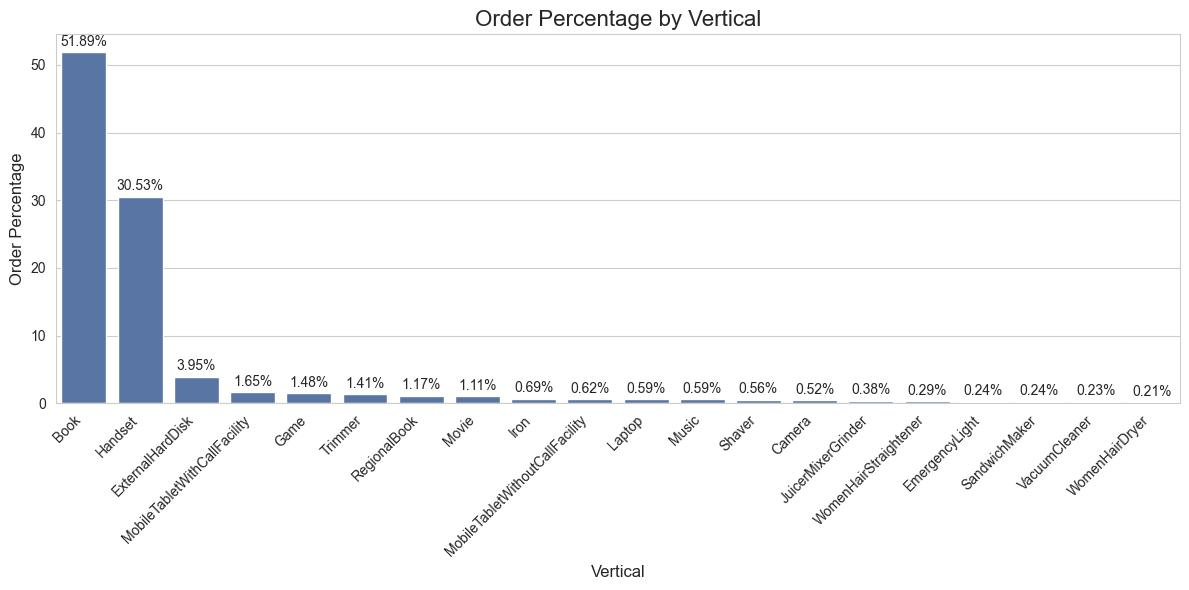

In [18]:
print("Number of unique verticals: ", df['vertical'].nunique())
result = round(100 * df['vertical'].value_counts() / len(df), 2).reset_index(drop=False)
result.columns = ['Vertical', 'Order % age']

sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Vertical', y='Order % age', data=result[:20])

plt.title('Order Percentage by Vertical', fontsize=16)
plt.xlabel('Vertical', fontsize=12)
plt.ylabel('Order Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of each bar
for i, v in enumerate(result['Order % age'][:20]):
    ax.text(i, v + 0.5, f'{v}%', ha='center', va='bottom')

# Adjust the plot layout
plt.tight_layout()

# Show the plot
plt.show()

- Total verticals: 46
- 8 verticals : represent 93.2% of number of orders
- Rest of 38 verticals represent < 1 % of number of orders
- Book, Handset, External Hard Disk are the top categories in terms of number of orders

In [19]:
df_fraud = df[df['label']=='fraud']
df_normal = df[df['label']!='fraud']
fraud_result = round(100 * df_fraud['vertical'].value_counts() / len(df_fraud), 2).reset_index(drop=False)
fraud_result.columns = ['Vertical', 'Fraud % age']
fraud_result[:10]

,Vertical,Fraud % age
0,Handset,60.60
1,MobileTabletWithCallFacility,14.49
2,ExternalHardDisk,10.44
3,Book,8.51
4,Game,1.60
5,Laptop,1.31
6,MobileTabletWithoutCallFacility,1.19
7,Camera,0.43
8,Trimmer,0.24
9,RegionalBook,0.22


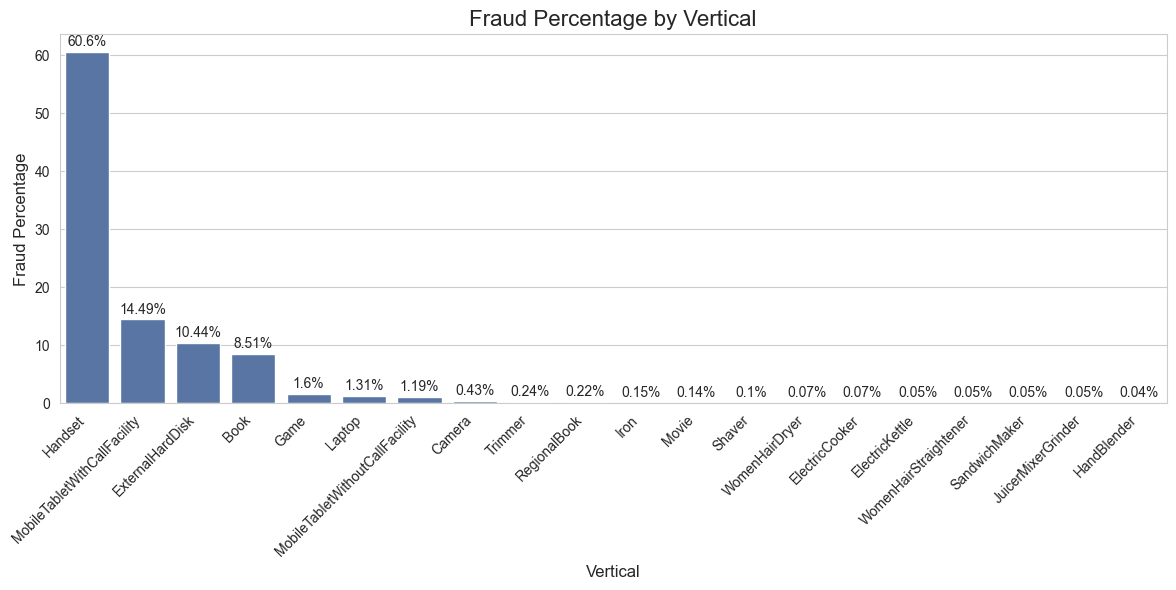

In [20]:
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Vertical', y='Fraud % age', data=fraud_result[:20])

plt.title('Fraud Percentage by Vertical', fontsize=16)
plt.xlabel('Vertical', fontsize=12)
plt.ylabel('Fraud Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of each bar
for i, v in enumerate(fraud_result['Fraud % age'][:20]):
    ax.text(i, v + 0.5, f'{v}%', ha='center', va='bottom')

# Adjust the plot layout
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
pd.merge(result, fraud_result)[:10]

,Vertical,Order % age,Fraud % age
0,Book,51.89,8.51
1,Handset,30.53,60.60
2,ExternalHardDisk,3.95,10.44
3,MobileTabletWithCallFacility,1.65,14.49
4,Game,1.48,1.60
5,Trimmer,1.41,0.24
6,RegionalBook,1.17,0.22
7,Movie,1.11,0.14
8,Iron,0.69,0.15
9,MobileTabletWithoutCallFacility,0.62,1.19


- Fraud orders Analysis
- Vertical comprising >90 % fraud orders : Handset, MobileTabletWithCallFacility, ExternalHardDisk, Book
- Order with overall higher % age of orders tend to have higher fraud rates

#### Discount Analysis

In [22]:
df.groupby(['label'])['discount'].mean()

label
fraud     17.134319
normal    15.331197
Name: discount, dtype: float64

Fraudster might be eyeing at 2% discount gap and leveraging that to make profit

In [23]:
# Vertical x Discount Range
pivot_result = round(df.pivot_table(values='discount', 
                              index='vertical', 
                              columns='label', 
                              aggfunc='mean'), 2).reset_index(drop=False)
pivot_result['gap'] = pivot_result['normal'] - pivot_result['fraud']
pivot_result = pivot_result.sort_values(by=['gap'], ascending=False)
pivot_result = pivot_result[(pivot_result['gap'] > 0) & (pivot_result['fraud']!=0)]
pivot_result

label,vertical,fraud,normal,gap
24,Lens,14.02,21.43,7.41
40,VacuumCleaner,6.54,12.84,6.30
13,Game,0.97,6.59,5.62
7,ElectricKettle,11.39,15.11,3.72
35,SandwichMaker,15.81,18.88,3.07
0,BloodPressureMonitor,28.66,30.69,2.03
39,Trimmer,8.34,10.29,1.95
19,InductionCooktop,27.49,29.03,1.54
43,WomenHairDryer,13.85,15.16,1.31
6,ElectricCooker,18.00,19.25,1.25


Here we observe that:
- Lens, VacuumCleaner, and Game verticals are the top 3 verticals with max discount gap

### Quantity Analysis

In [24]:
percentage_distribution = 100 * df['quantity'].value_counts() / len(df)
percentage_distribution

quantity
1     95.303747
3      2.982497
2      1.697336
5      0.007067
4      0.004988
10     0.002494
6      0.000831
9      0.000624
8      0.000416
Name: count, dtype: float64

/var/folders/c1/cx9vtgy52hzgnvv0yk5psxxh0000gn/T/ipykernel_3128/1852095473.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values, palette='viridis')


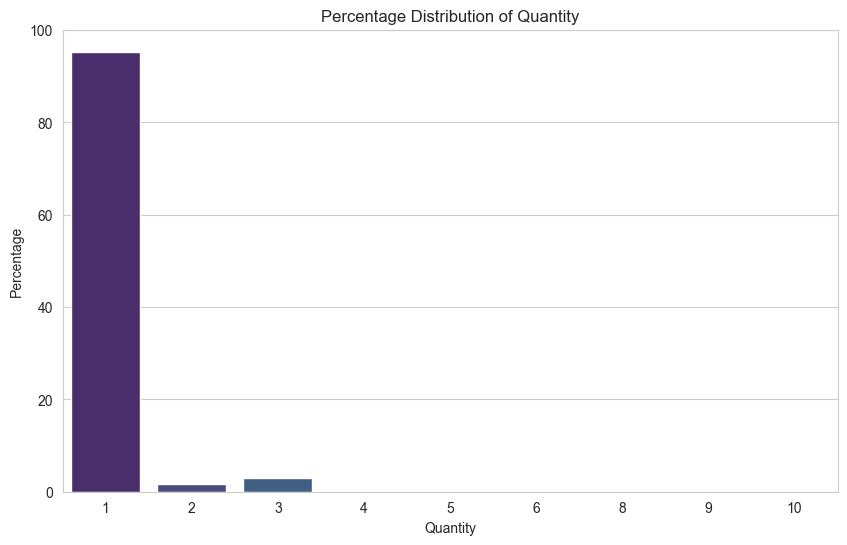

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values, palette='viridis')
plt.title('Percentage Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Percentage')
plt.show()

In [26]:
df.groupby(['label'])['quantity'].mean()

label
fraud     1.083062
normal    1.077128
Name: quantity, dtype: float64

-  '>95% orders are where quantity ordered was 1'
-  On average, quantity placed is 1(both for fraud and normal orders)

#### Price analysis

In [27]:
(df['selling_price'] / df['quantity']).mean()

4315.935100605942

In [28]:
# Vertical x Discount Range
df['price'] = (df['selling_price'] / df['quantity']) #As 
pivot_result = round(df.pivot_table(values='price', 
                              index='vertical', 
                              columns='label', 
                              aggfunc='mean'), 2).reset_index(drop=False)
pivot_result['gap'] = pivot_result['normal'] - pivot_result['fraud']
pivot_result = pivot_result.sort_values(by=['gap'], ascending=False)
pivot_result = pivot_result[(pivot_result['gap'] > 0) & (pivot_result['fraud']!=0)]
pivot_result

label,vertical,fraud,normal,gap
23,Laptop,25746.70,30287.33,4540.63
38,Television,20852.25,24576.42,3724.17
24,Lens,6937.75,10270.66,3332.91
27,MobileTabletWithoutCallFacility,10823.54,12719.56,1896.02
26,MobileTabletWithCallFacility,10478.49,12136.20,1657.71
3,Camera,16436.05,17290.58,854.53
36,Shaver,1542.62,2177.52,634.90
12,FoodProcessor,4450.00,4958.38,508.38
42,WomenHairCurler,1200.00,1466.71,266.71
43,WomenHairDryer,1129.13,1332.95,203.82


- more than 1000 gap in price per unit is observed for verticals: Laptop, Television, Lens, MobileTablet(with/without)CallFacility
- These are products with higher average selling price, as higher price -> more margins

In [29]:
## Margin higher in costly items -> electronic items
df1 = df[df['label']=='fraud']
print("Average Selling price for fraud orders: ", round((df1['selling_price'] / df1['quantity']).mean(), 2))

df1 = df[df['label']!='fraud']
print("Average Selling price for normal orders: ", round((df1['selling_price'] / df1['quantity']).mean(), 2))


Average Selling price for fraud orders:  10910.67
Average Selling price for normal orders:  3998.72


Significant average price in fraud vs normal orders

label             fraud    normal
shipping_type                    
ndd            0.113455  0.886545
non-ndd        0.040743  0.959257


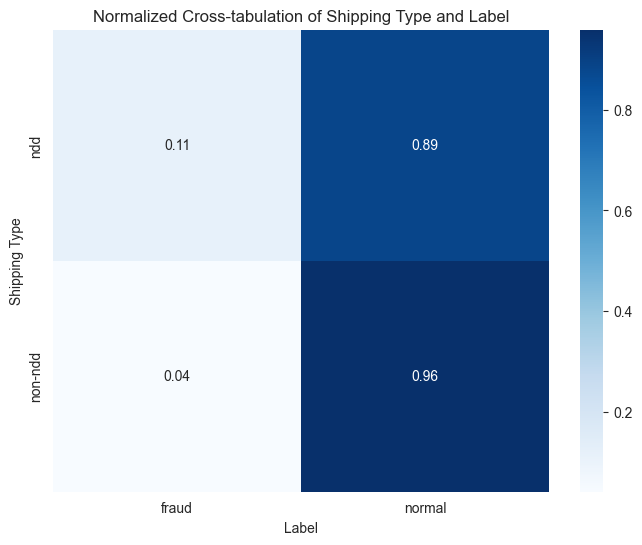

In [30]:
cross_tab = pd.crosstab(df['shipping_type'], df['label'])

# Normalize by label class (columns)
cross_tab_normalized = cross_tab.div(cross_tab.sum(axis=1), axis=0)
print(cross_tab_normalized)

# Visualization with Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab_normalized, annot=True, cmap='Blues', fmt='.2f')
plt.title('Normalized Cross-tabulation of Shipping Type and Label')
plt.xlabel('Label')
plt.ylabel('Shipping Type')
plt.show()

There is high probability for Next Day Delivery to be a fraudulent order as compared to Non-ndd orders

### Modelling


1. EDA
2. Feature Engineering 
3. Feature Transformation
4. Featue set Creation(train & test)
5. Model selection -> Binary classification
- Logistic regression : Baseline algorithm
- DT Classifier 
- Random Forest Classifer(bagging) - right 
- Boosting - XGBoost Classifier 

6. Iterative error analysis:
- Feature re-engineering / importance

7. Imbalanced dataset : - Choosing right evaluation metrics 
8. Evaluation metrics : Accuracy, Recall(FN), Precision(FP), F-score
- Precision : Reduce 
- Recall : Reduced
- AUC-ROC : threshold -> predictions
- F-score :
  
9. Business metrics : 